<a href="https://colab.research.google.com/github/u1353279/DATA_PHD/blob/main/Milton_Degdredation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (9, 9)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Degredation Analysis for Milton PV-01

In [2]:
milton_1 = pd.read_csv('/content/drive/MyDrive/PHD/Data/Milton1.csv')

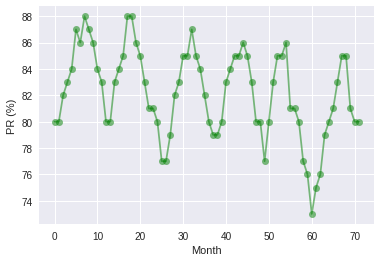

In [3]:
fig, axs = plt.subplots()
axs.plot(milton_1.index, milton_1.PR, 'o-', alpha = 0.5,color='g')
axs.set_ylabel('PR (%)');
axs.set_xlabel('Month')

resolution = 12
s=sm.tsa.seasonal_decompose(milton_1.PR, model = 'multiplicative', freq = resolution)
#s.plot()

In [4]:
trend_df = pd.DataFrame(list(s.trend), columns = ['Trend'])
trend_df.insert(loc=0, column = 'Month', value=np.arange(len(trend_df)))
trend_df=trend_df[np.isfinite(trend_df['Trend'])]
y = trend_df.Trend
x = trend_df.Month
x, y = np.array(x), np.array(y)

x = sm.add_constant(x)

In [5]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     157.1
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           3.76e-18
Time:                        18:50:22   Log-Likelihood:                -75.080
No. Observations:                  60   AIC:                             154.2
Df Residuals:                      58   BIC:                             158.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.0338      0.253    335.748      0.000      84.527      85.541
x1            -0.0804      0.006    -12.535      0.000      -0.093      -0.068
==============================================================================
Omnibus:                        2.597   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                1.525
Skew:                          -0.052   Prob(JB):                        0.467
Kurtosis:                       2.226   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Result interpretation

##### R-squared values is closer to one showing that the model has a good fit.

##### As the Prob (F-statistic) is less than 0.05 we can reject the null hypothesis ( the intercept only model is same as the co-effiecent model. if the null hypothesis was true the model would be useless. However this is not the case.

##### x1- p-value is equal to zero which can be interpreted as the feature co-efficient is not zero, tehrefore does have a relationship with the target.

In [6]:
#confidence level 95%
intercept, slope = results.params
CI_abs = resolution*results.conf_int(alpha = 0.05)[1]
CIL_abs = CI_abs[1]
CIH_abs = CI_abs[0]
round(CIL_abs,2),round(CIH_abs,2)

DR_abs = round(resolution*slope, 2)
DR_abs

-0.96

In [7]:
results.params

array([ 8.50338389e+01, -8.03741780e-02])

In [8]:
#confidence level 95%
CI_rel = 100*resolution*results.conf_int(alpha = 0.05)[1]/intercept
CIL_rel = CI_rel[1]
CIH_rel = CI_rel[0]
round(CIL_rel,2),round(CIH_rel,2)

DR_rel = round(100*resolution*slope/intercept,2)
DR_rel

-1.13

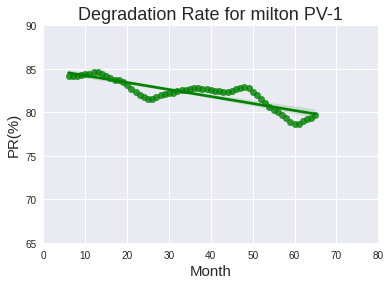

In [9]:
sns.regplot(y = trend_df['Trend'], x = trend_df['Month'], data = milton_1, color='g')
plt.ylabel("PR(%)",fontsize=15)
plt.xlabel("Month", fontsize=15)
plt.ylim(65,90)
plt.xlim(0, 80)
plt.title("Degradation Rate for milton PV-1",fontsize=18)
plt.grid(True)
plt.show()

##### Yearly degredation for Milton PV-1 range -0.96 & -1.13%

# Degredation Analysis for Milton PV-02

In [10]:
milton_2 = pd.read_csv('/content/drive/MyDrive/PHD/Data/Milton2.csv')

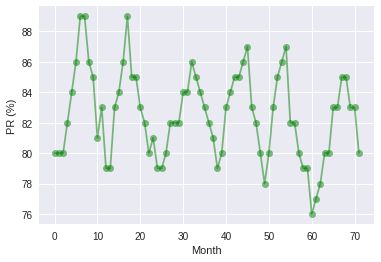

In [12]:
fig, axs = plt.subplots()
axs.plot(milton_2.index, milton_2.PR, 'o-', alpha = 0.5,color='g')
axs.set_ylabel('PR (%)');
axs.set_xlabel('Month')

resolution = 12
s=sm.tsa.seasonal_decompose(milton_2.PR, model = 'multiplicative', freq = resolution)
#s.plot()

In [13]:
trend_df = pd.DataFrame(list(s.trend), columns = ['Trend'])
trend_df.insert(loc=0, column = 'Month', value=np.arange(len(trend_df)))
trend_df=trend_df[np.isfinite(trend_df['Trend'])]
y = trend_df.Trend
x = trend_df.Month
x, y = np.array(x), np.array(y)

x = sm.add_constant(x)

In [14]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     62.44
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           8.94e-11
Time:                        18:53:07   Log-Likelihood:                -67.557
No. Observations:                  60   AIC:                             139.1
Df Residuals:                      58   BIC:                             143.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.0965      0.223    376.403      0.000      83.649      84.544
x1            -0.0447      0.006     -7.902      0.000      -0.056      -0.033
==============================================================================
Omnibus:                        1.836   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.399   Jarque-Bera (JB):                1.323
Skew:                          -0.116   Prob(JB):                        0.516
Kurtosis:                       2.311   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Result interpretation

##### R-squared values is closer to one showing that the model has a good fit.

##### As the Prob (F-statistic) is less than 0.05 we can reject the null hypothesis ( the intercept only model is same as the co-effiecent model. if the null hypothesis was true the model would be useless. However this is not the case.

##### x1- p-value is equal to zero which can be interpreted as the feature co-efficient is not zero, thErefore does have a relationship with the target.

In [15]:
#confidence level 95%
intercept, slope = results.params
CI_abs = resolution*results.conf_int(alpha = 0.05)[1]
CIL_abs = CI_abs[1]
CIH_abs = CI_abs[0]
round(CIL_abs,2),round(CIH_abs,2)

DR_abs = round(resolution*slope, 2)
DR_abs

-0.54

In [16]:
results.params

array([ 8.40964871e+01, -4.46976012e-02])

In [17]:
#confidence level 95%
CI_rel = 100*resolution*results.conf_int(alpha = 0.05)[1]/intercept
CIL_rel = CI_rel[1]
CIH_rel = CI_rel[0]
round(CIL_rel,2),round(CIH_rel,2)

DR_rel = round(100*resolution*slope/intercept,2)
DR_rel

-0.64

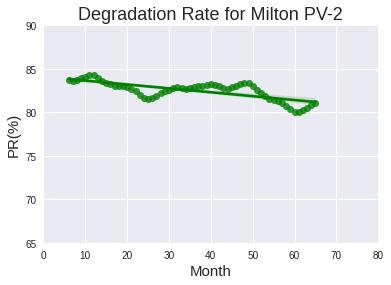

In [19]:
sns.regplot(y = trend_df['Trend'], x = trend_df['Month'], data = milton_2, color='g')
plt.ylabel("PR(%)",fontsize=15)
plt.xlabel("Month", fontsize=15)
plt.ylim(65,90)
plt.xlim(0, 80)
plt.title("Degradation Rate for Milton PV-2",fontsize=18)
plt.grid(True)
plt.show()

##### Yearly degredation for Milton PV-2 range -0.54 & -0.64%

# Degredation Analysis for Milton PV-03

In [21]:
milton_3 = pd.read_csv('/content/drive/MyDrive/PHD/Data/Milton3.csv')

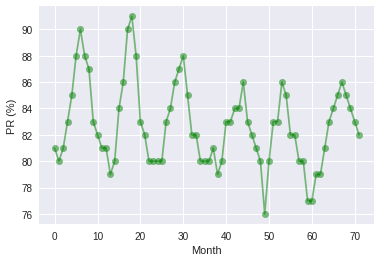

In [22]:
fig, axs = plt.subplots()
axs.plot(milton_3.index, milton_3.PR, 'o-', alpha = 0.5,color='g')
axs.set_ylabel('PR (%)');
axs.set_xlabel('Month')

resolution = 12
s=sm.tsa.seasonal_decompose(milton_3.PR, model = 'multiplicative', freq = resolution)
#s.plot()

In [23]:
trend_df = pd.DataFrame(list(s.trend), columns = ['Trend'])
trend_df.insert(loc=0, column = 'Month', value=np.arange(len(trend_df)))
trend_df=trend_df[np.isfinite(trend_df['Trend'])]
y = trend_df.Trend
x = trend_df.Month
x, y = np.array(x), np.array(y)

x = sm.add_constant(x)

In [24]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     394.1
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           1.53e-27
Time:                        19:00:13   Log-Likelihood:                -29.241
No. Observations:                  60   AIC:                             62.48
Df Residuals:                      58   BIC:                             66.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.6987      0.118    717.947      0.000      84.463      84.935
x1            -0.0593      0.003    -19.852      0.000      -0.065      -0.053
==============================================================================
Omnibus:                        4.092   Durbin-Watson:                   0.196
Prob(Omnibus):                  0.129   Jarque-Bera (JB):                3.572
Skew:                           0.311   Prob(JB):                        0.168
Kurtosis:                       4.021   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Result interpretation

##### R-squared values is closer to one showing that the model has a good fit.

##### As the Prob (F-statistic) is less than 0.05 we can reject the null hypothesis ( the intercept only model is same as the co-effiecent model. if the null hypothesis was true the model would be useless. However this is not the case.

##### x1- p-value is equal to zero which can be interpreted as the feature co-efficient is not zero, thErefore does have a relationship with the target.

In [25]:
#confidence level 95%
intercept, slope = results.params
CI_abs = resolution*results.conf_int(alpha = 0.05)[1]
CIL_abs = CI_abs[1]
CIH_abs = CI_abs[0]
round(CIL_abs,2),round(CIH_abs,2)

DR_abs = round(resolution*slope, 2)
DR_abs

-0.71

In [26]:
results.params

array([ 8.46986547e+01, -5.92930907e-02])

In [27]:
#confidence level 95%
CI_rel = 100*resolution*results.conf_int(alpha = 0.05)[1]/intercept
CIL_rel = CI_rel[1]
CIH_rel = CI_rel[0]
round(CIL_rel,2),round(CIH_rel,2)

DR_rel = round(100*resolution*slope/intercept,2)
DR_rel

-0.84

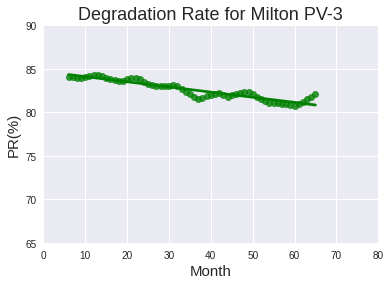

In [28]:
sns.regplot(y = trend_df['Trend'], x = trend_df['Month'], data = milton_3, color='g')
plt.ylabel("PR(%)",fontsize=15)
plt.xlabel("Month", fontsize=15)
plt.ylim(65,90)
plt.xlim(0, 80)
plt.title("Degradation Rate for Milton PV-3",fontsize=18)
plt.grid(True)
plt.show()

##### Yearly degredation for Milton PV-3 range -0.71 & -0.84%